# SPheno example

In [1]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
import hepi.resummino as rs
import hepi.util as util
import hepi.spheno as sp
import matplotlib.pyplot as plt

rs.set_path("~/git/resummino_ug_to_UX_vNLO")
sp.set_path("~/git/SPheno-3.3.8")
print (rs.get_path())
print (sp.get_path())

0.1.4.15+dirty
~/git/resummino_ug_to_UX_vNLO/
~/git/SPheno-3.3.8/


FileNotFoundError: [Errno 2] No such file or directory: './input/LesHouches.in'

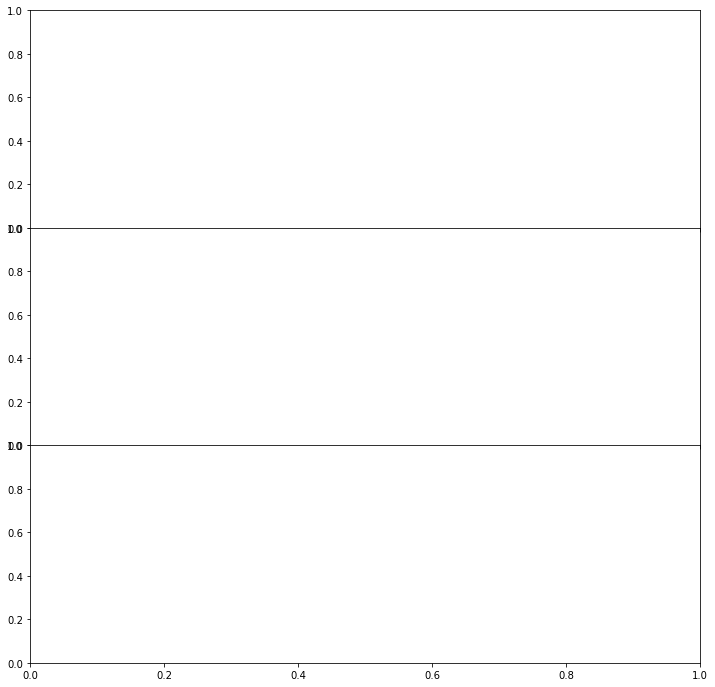

In [2]:
for sq in [2000002,1000002]:
    fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    fig.subplots_adjust(hspace=0)
    for pdf,nlopdf in [("CT14lo","CT14lo")]:
        li = [hepi.Input(hepi.Order.LO,13000,sq,1000022,"LesHouches.in",pdf,nlopdf,1., 1.,id="test")]
        li=hepi.slha_scan_rel(li,lambda r : [["EXTPAR",1,510],["EXTPAR",2,r]],np.linspace(470.,530.,16))
        sp.run(li)
        dl = rs.run(li,False,False)
        for p in [1000022,1000023,1000025,1000035]:
            hepi.slha_plot(li,["EXTPAR",2],["MASS",p],axes=axs[0],logy=True,xaxis="$M_2$ [GeV]",yaxis="$M$",label="$"+hepi.util.get_name(p)+"$",tight=False)
        for nm1 in [1]:
            for nm2 in [1,2,3,4]:
                hepi.slha_plot(li,["EXTPAR",2],["NMIX",(nm1,nm2)],fmt="-",interpolate=False,xaxis="$M_2$ [GeV]",yaxis="Mixing",logy=False,axes=axs[1],label="$"+"N_{"+ str(nm1)+ str(nm2)+"}$",tight=False)
        hepi.vplot(hepi.slha_data(li,["EXTPAR",2]),dl["lo"],plot_data=True,axes=axs[2],xaxis="$M_2$ [GeV]",yaxis= "$\sigma$ [pb]",tight=False,label="$\sigma_{lo}$")

In [ ]:
for sq in [2000002,1000002]:
    for pdf,nlopdf in [("CT14lo","CT14lo")]:
        li = [hepi.Input(hepi.Order.LO,13000,sq,1000022,"LesHouches.in",pdf,nlopdf,1., 1.,id="test")]
        #li=hepi.slha_scan_rel(li,lambda r : [["EXTPAR",1,r],["EXTPAR",2,r]],np.linspace(500.,1500.,16*2))

        li=hepi.slha_scan(li,"EXTPAR",1,np.linspace(500.,1500.,16))
        li=hepi.slha_scan(li,"EXTPAR",2,np.linspace(500.,1500.,16))
        sp.run(li)
        dl = rs.run(li,False,False)
        for nm1 in [1]:
            for nm2 in [1,2]:
                print(nm2)
                hepi.map_vplot(hepi.slha_data(li,["EXTPAR",1]),hepi.slha_data(li,["EXTPAR",2]),
                               hepi.slha_data(li,["NMIX",(nm1,nm2)]),logz=False,xaxis="$M_1$",yaxis="$M_2$",zaxis="Mixing")
        
        hepi.map_vplot(hepi.slha_data(li,["EXTPAR",1]),hepi.slha_data(li,["EXTPAR",2]),dl["lo"],xaxis="$M_1$",yaxis="$M_2$",zaxis="$\sigma_{lo}$")

In [ ]:
dll = {}
sqs=[2000002,1000002]
for sq in sqs:
    for pdf,nlopdf in [("CT14lo","CT14lo")]:
        li = [hepi.Input(hepi.Order.LO,13000,sq,1000022,"LesHouches.in",pdf,nlopdf,1., 1.,id="test")]
        #li=hepi.slha_scan_rel(li,lambda r : [["EXTPAR",1,r],["EXTPAR",2,r]],np.linspace(500.,1500.,16*2))

        li=hepi.slha_scan(li,"EXTPAR",1,np.linspace(475.,525.,10+1))
        li=hepi.slha_scan(li,"EXTPAR",2,np.linspace(450.,500.,10+1))
        sp.run(li)
        dl = rs.run(li,False,False)
        for nm1 in [1]:
            for nm2 in [1,2]:
                print(nm2)
                hepi.map_vplot(hepi.slha_data(li,["EXTPAR",1]),hepi.slha_data(li,["EXTPAR",2]),
                               hepi.slha_data(li,["NMIX",(nm1,nm2)]),logz=False,xaxis="$M_1$",yaxis="$M_2$",zaxis="Mixing")
        
        hepi.map_vplot(hepi.slha_data(li,["EXTPAR",1]),hepi.slha_data(li,["EXTPAR",2]),
                       dl["lo"],xaxis="$M_1$",yaxis="$M_2$",zaxis="$\sigma_{lo}$")
        hepi.map_vplot(hepi.slha_data(li,["EXTPAR",1]),hepi.slha_data(li,["EXTPAR",2]),
                       hepi.slha_data(li,["MASS",1000022]),xaxis="$M_1$",yaxis="$M_2$",zaxis="$MX$")
        dll[sq] = dl

hepi.map_vplot(hepi.slha_data(li,["EXTPAR",1]),hepi.slha_data(li,["EXTPAR",2]),
                       dll[sqs[0]]["lo"]+dll[sqs[1]]["lo"],xaxis="$M_1$",yaxis="$M_2$",zaxis="$\sigma_{lo+lo}$")
    